# <span style="color:blue">Introduction to Pandas</span>

Pandas is a Python module that contains structures and functions useful for data exploration and analysis.

open :  23
source :  18
business :  16
erp :  9
software :  8
customers :  8
company :  8
project :  8
process :  8
team :  5
work :  5
best :  4
analyze :  4
able :  4
help :  4
processes :  4
consultants :  4
clients :  4
optimize :  4
consulting :  3


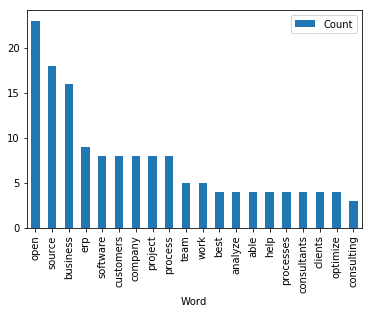

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
%matplotlib inline

with open('./osi.txt', 'r') as f:
    data = f.read()

#filter out stopwords ((articles & prepositions & common/insignificant words)
stopwords = set(line.strip() for line in open('./stopwords.txt'))

wordcount = {}
for word in data.lower().split():
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
#counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(20):
    print(word, ": ", count)
    
# Create a data frame of the most common words 
lst = word_counter.most_common(20)

# Draw a bar chart
osi = pd.DataFrame(lst, columns = ['Word', 'Count'])
osi.plot.bar(x='Word', y='Count')

# Key words:  <span style="color:orange">Customer, Project, Process</span>

Let's do a exploratory data analysis on customers from this real ecommerce store in Brazil 

Pandas: a library built on Python that manipulates and analyze data.



Matplotlib: used to embed plots and visualize data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime as dt

In [3]:
customer_data = pd.read_csv('../data/olist_customers_dataset.csv')
geo_data = pd.read_csv('../data/olist_geolocation_dataset.csv')
orders_data = pd.read_csv('../data/olist_orders_dataset.csv')
order_items_data = pd.read_csv('../data/olist_order_items_dataset.csv')
payments_data = pd.read_csv('../data/olist_order_payments_dataset.csv')
reviews_data = pd.read_csv('../data/olist_order_reviews_dataset.csv')
order_details_data = pd.read_csv('../data/olist_orders_dataset.csv')
products_data = pd.read_csv('../data/olist_products_dataset.csv')
review_translation_data = pd.read_csv('../data/product_category_name_translation.csv')

In [4]:
#customer & orders_data
merged1 = pd.merge(customer_data, orders_data, on='customer_id')
#merged1 & order_items
merged2 = pd.merge(merged1, order_items_data, on='order_id')
#merged2 & payments_data
merged3 = pd.merge(merged2, payments_data, on='order_id')
merged4 = pd.merge(merged3, reviews_data, on='order_id')

In [5]:
#merged3 & reviews_data
translation = pd.merge(products_data, review_translation_data, on='product_category_name')
df = pd.merge(merged4, translation, on='product_id')  

In [6]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


![](../data/olist.png)
![](olist.png)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
customer_id                      116581 non-null object
customer_unique_id               116581 non-null object
customer_zip_code_prefix         116581 non-null int64
customer_city                    116581 non-null object
customer_state                   116581 non-null object
order_id                         116581 non-null object
order_status                     116581 non-null object
order_purchase_timestamp         116581 non-null datetime64[ns]
order_approved_at                116567 non-null object
order_delivered_carrier_date     115368 non-null datetime64[ns]
order_delivered_customer_date    114066 non-null datetime64[ns]
order_estimated_delivery_date    116581 non-null datetime64[ns]
order_item_id                    116581 non-null int64
product_id                       116581 non-null object
seller_id                        116581 non-null object
shipping_limit_date

# <span style="color:orange">Which product categories sell the most?<span>

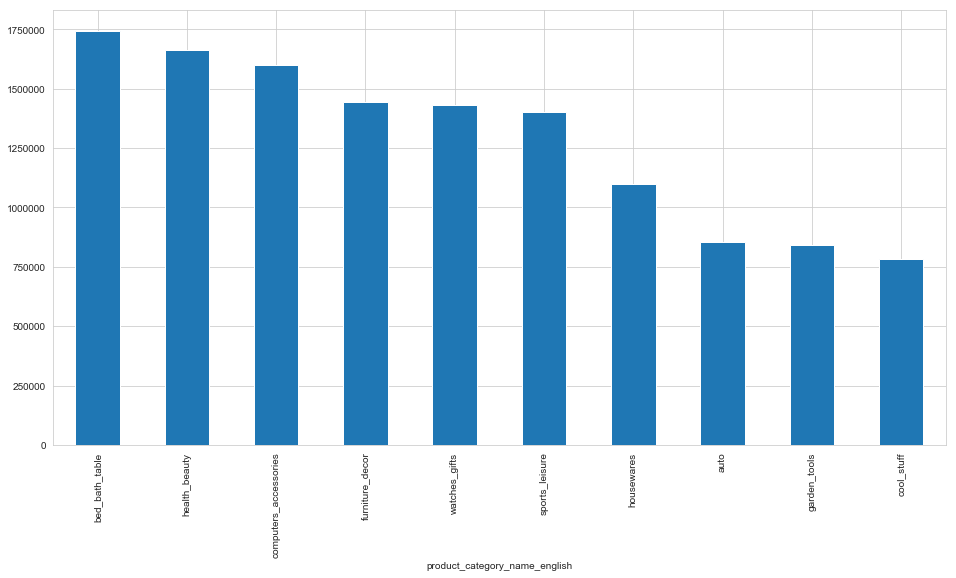

In [89]:
sales_per_category = df.groupby('product_category_name_english')['payment_value'].sum()
top_10_category = sales_per_category.sort_values(ascending=False).head(10)
plt.figure(figsize=(16,8))
top_10_category.plot(kind="bar",rot=90)

# <span style="color:orange">Which categories sell the least?<span>

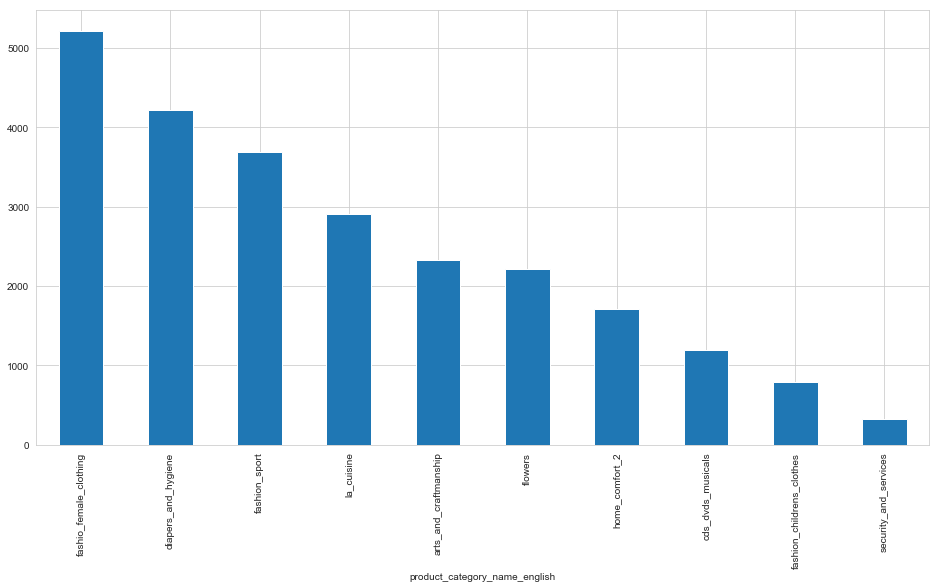

In [93]:
sales_per_category = df.groupby('product_category_name_english')['payment_value'].sum()
bottom_10_category = sales_per_category.sort_values(ascending=False).tail(10)
plt.figure(figsize=(16,8))
bottom_10_category.plot(kind="bar",rot=90)

# <span style="color:orange">What price range do products fall into?<span>

(0, 600)

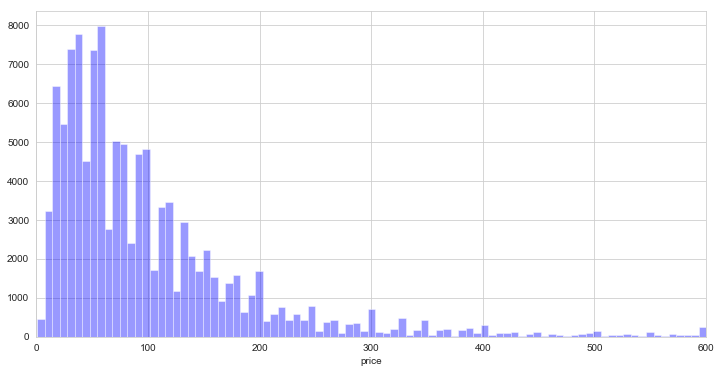

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['price'], bins=1000 ,kde=False, color='b')
plt.xlim([0, 600])

**<span style="color:green">Most items are around R40-50</span>**

# <span style="color:orange">How are customers paying?<span>

Text(0, 0.5, '')

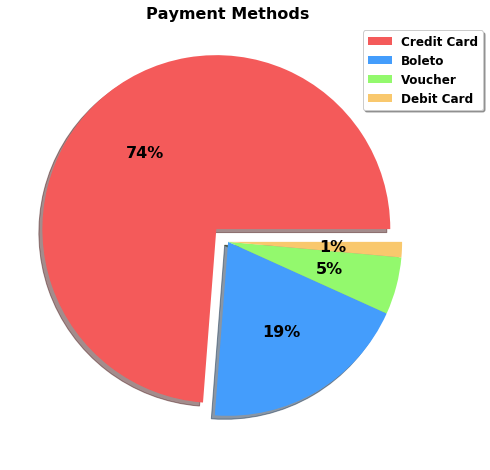

In [16]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0)
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Credit Card", "Boleto", "Voucher", "Debit Card"]

p = df["payment_type"][df["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Payment Methods", fontweight='bold', size=16)
plt.ylabel("")

# <span style="color:orange">How are review_scores among categories?<span>


In [118]:
# creating an aggregation
avg_score_per_category = df.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['product_category_name_english', 'count', 'mean']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 50]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category.head()

,product_category_name_english,count,mean
8,books_general_interest,565,4.431858
9,books_imported,62,4.419355
10,books_technical,272,4.345588
22,costruction_tools_tools,105,4.333333
64,small_appliances_home_oven_and_coffee,78,4.320513


Text(0.5, 1.0, 'Categories Review Score')

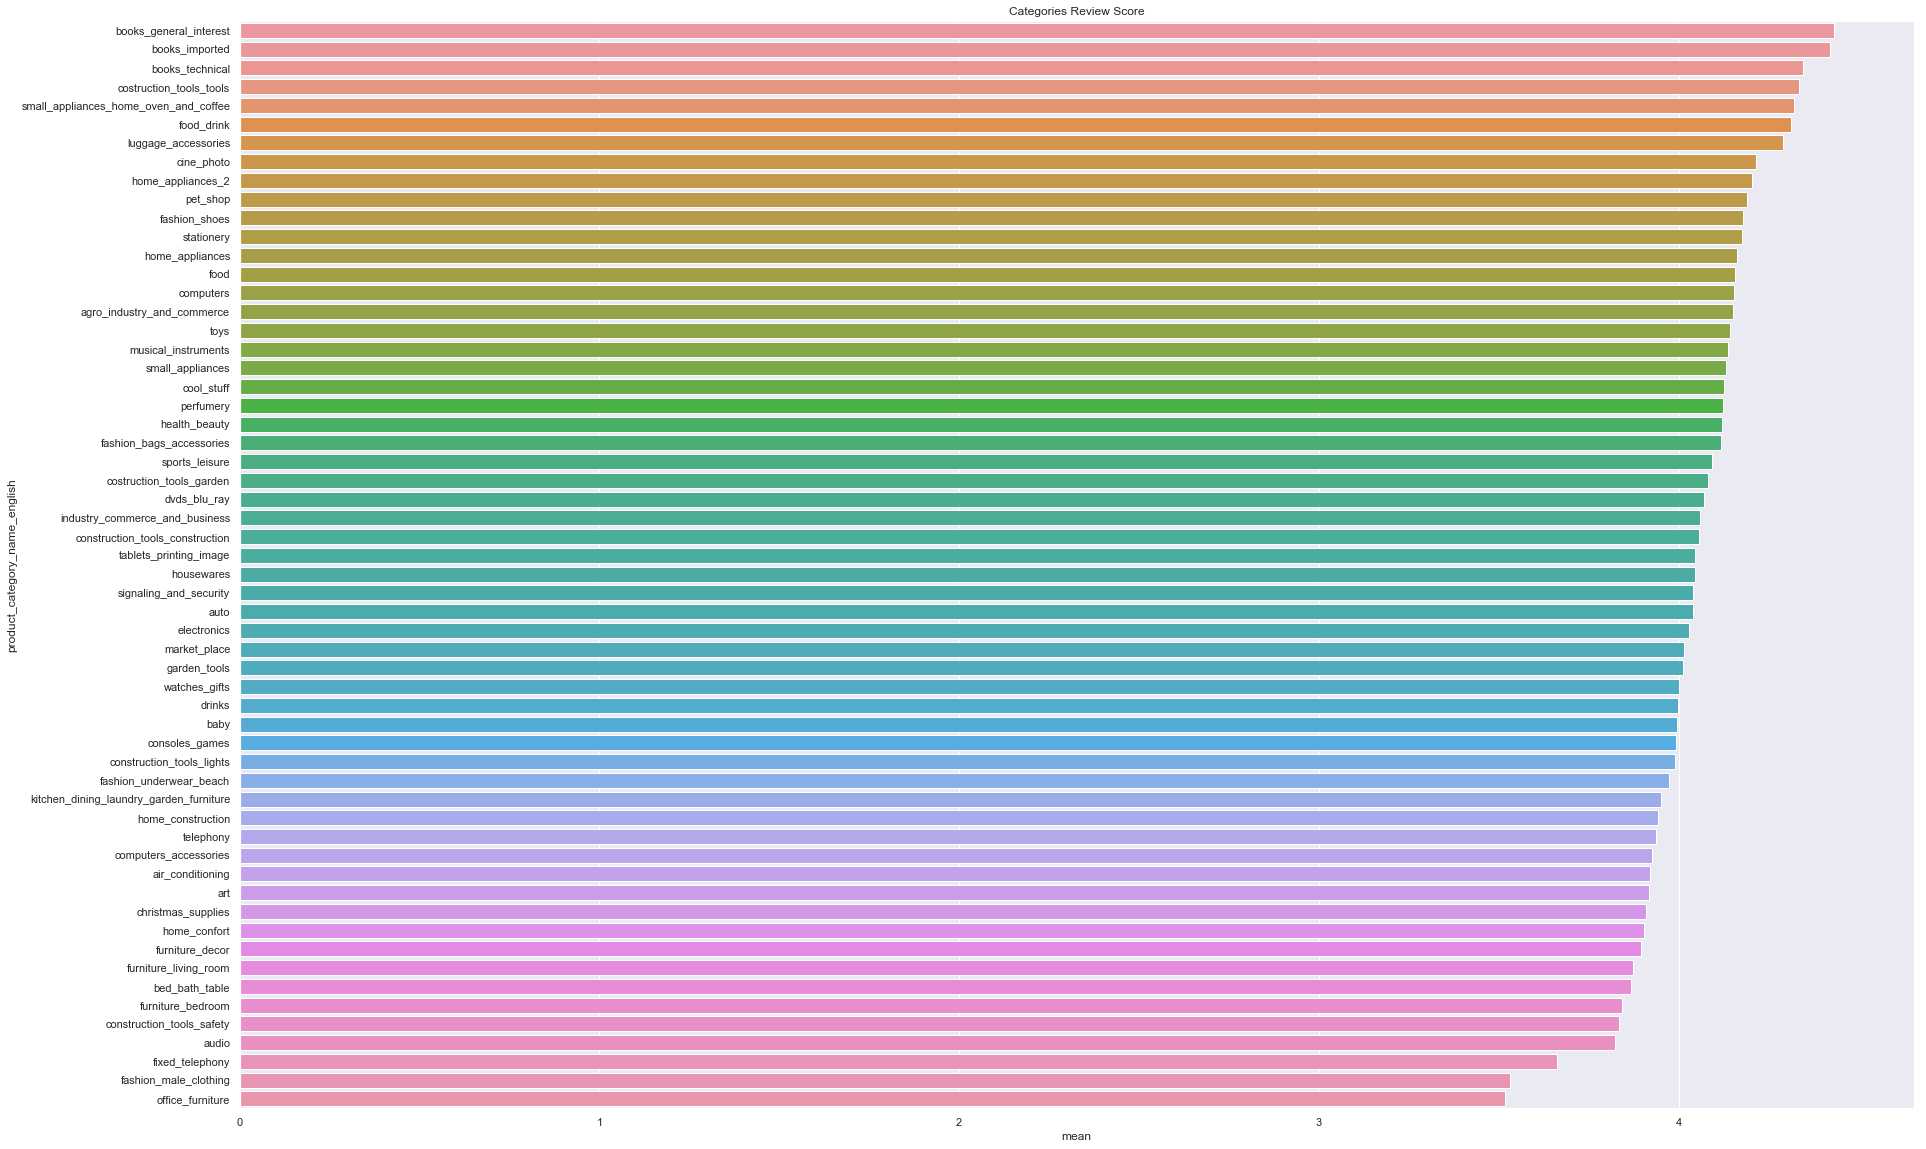

In [111]:
ax = sns.barplot(x="mean", y="product_category_name_english", data=avg_score_per_category)
sns.set(rc={'figure.figsize':(30,15)})
ax.set_title('Categories Review Score')

**<span style="color:green">Books :) <br>
Office Furniture :( <span>**

# <span style="color:orange">What is the average time of delivery?<span>

In [17]:
(df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).describe()

count                     114066
mean     11 days 08:39:16.857389
std      10 days 03:52:05.743072
min          -189 days +00:35:53
25%       6 days 12:13:04.500000
50%             12 days 01:26:59
75%      16 days 07:37:53.750000
max            146 days 00:23:13
dtype: object

**<span style="color:green">11 Days<span>**

# <span style="color:orange">Could late delivery be strongly correlated with a low review score?<span>

In [73]:
df['delivery_accuracy']= df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['delivery_accuracy'].head()

0   10 days 13:24:25
1   20 days 23:50:10
2   20 days 23:50:10
3   16 days 14:05:56
4   21 days 02:51:00
Name: delivery_accuracy, dtype: timedelta64[ns]

In [76]:
df['delivery_accuracy'] = df['delivery_accuracy'].dt.days
df['delivery_accuracy'].head()

0    10.0
1    20.0
2    20.0
3    16.0
4    21.0
Name: delivery_accuracy, dtype: float64

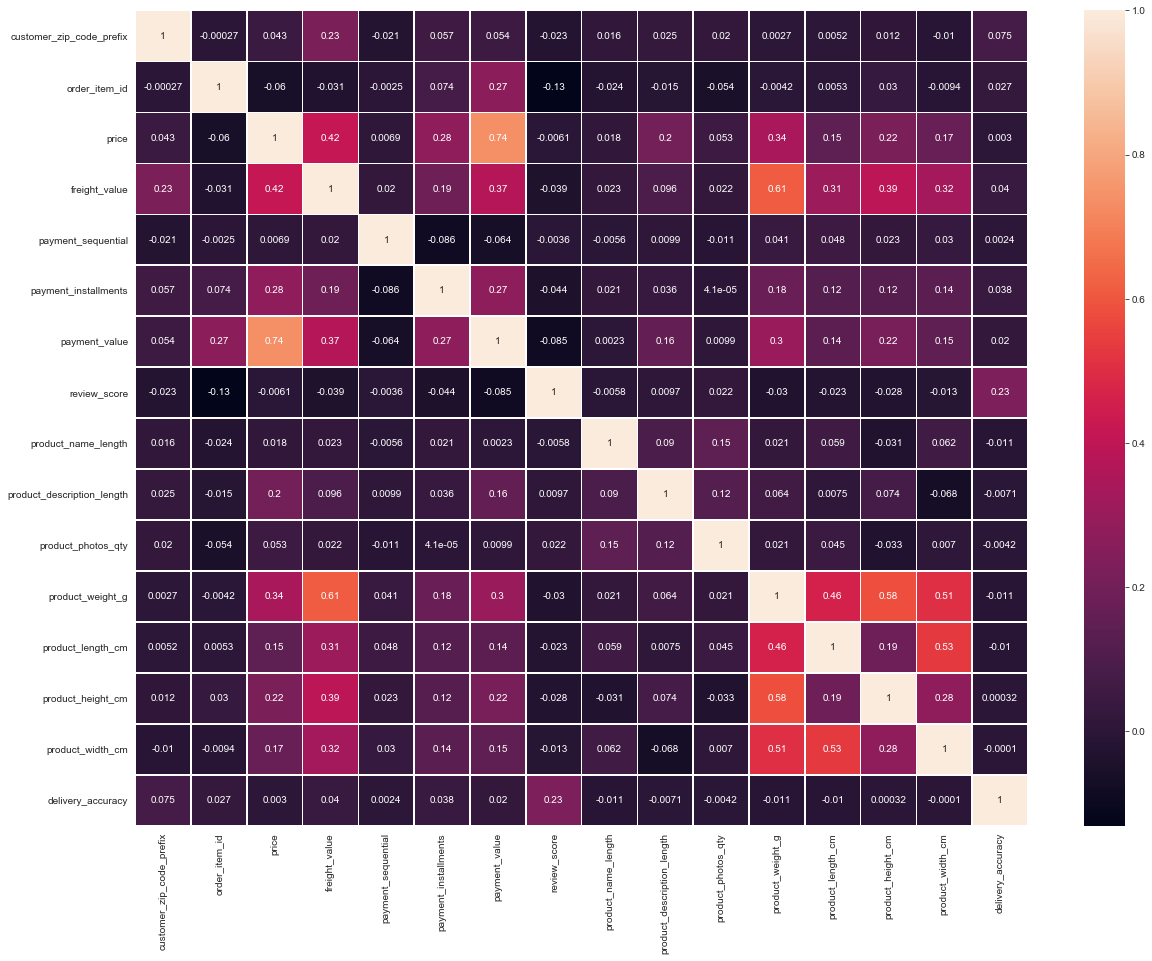

In [79]:
cor = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(cor, annot=True, linewidths=0.5)

**<span style="color:green">Correlation of 23%! Let's investigate further.<span>**

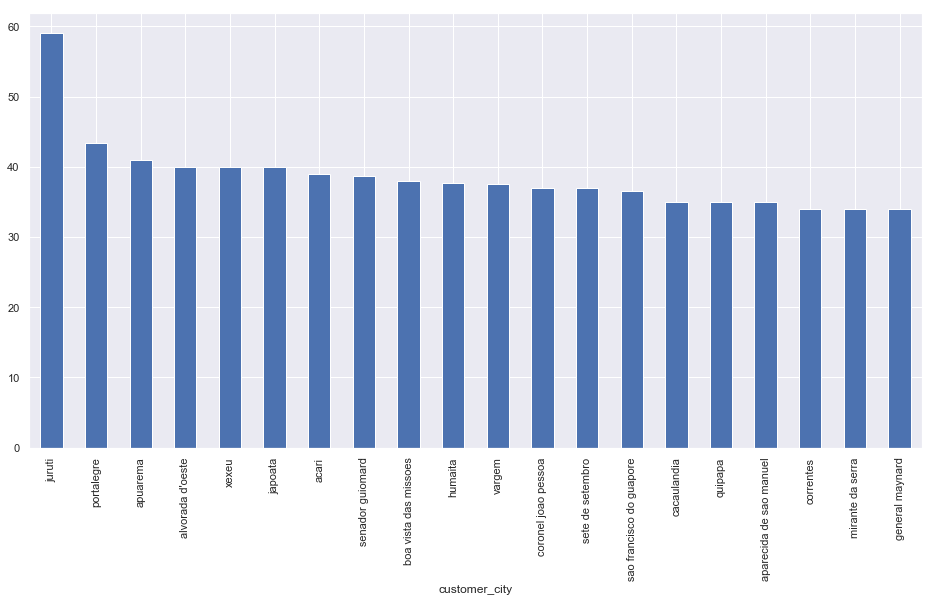

In [113]:
lateness = df.groupby('customer_city')['delivery_accuracy'].mean()
lateness = lateness.sort_values(ascending=False).head(20)
plt.figure(figsize=(16,8))
lateness.plot(kind="bar",rot=90)

**<span style="color:green">Juruti has late delivery as late as average of almost 60 days!<span>**